# EDA Checklist

## Outline
- [Necessary packages](#necessary_packages)
- [Data Loading](#data_loading)
- [Basic EDA](#basic_eda)
- [Plots](#plots)
- [Word frequency analysis](#word_frequency_analysis)
- [Correlations analysis](#correlations_analysis)
- [Conclusions](#conclusions)

<div id="necessary_packages" >
    <h3>Necessary packages</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import nltk
import os
from wordcloud import WordCloud
from functools import reduce

<div id="data_loading" >
    <h3>Data Loading</h3>
</div>

In [2]:
path = os.path.join("..","data","clean_df.csv")
df = pd.read_csv(path,encoding="iso-8859-1")
df.fillna("", inplace=True) # pandas interpet empty strings as missing values

<div id="basic_eda" >
    <h3>Basic EDA</h3>
</div>

- Examine the top and the tail of the list

In [3]:
df.head()

,class,content,urls_count,digits_count,contains_currency_symbols,length
0,0,subject enron methanol meter follow note gave ...,0,4,False,327
1,-1,subject hpl nom januari see attach file hplnol...,0,4,False,97
2,-1,subject neon retreat ho ho ho around wonder ti...,0,9,False,2524
3,-1,subject photoshop window offic cheap main tren...,0,0,False,414
4,-1,subject indian spring deal book teco pvr reven...,0,0,False,336


In [4]:
df.tail()

,class,content,urls_count,digits_count,contains_currency_symbols,length
4988,-1,subject fw crosstex energi driscol ranch meter...,0,21,True,869
4989,-1,subject put ft transport volum decreas contrac...,0,19,False,534
4990,-1,subject follow nom hpl take extra mmcf weekend...,0,33,False,1114
4991,-1,subject industri worksheet august activ attach...,0,5,False,573
4992,-1,subject import onlin bank alert dear valu citi...,0,2,False,1114


- Examine the dimensions of the dataset

In [5]:
df.shape

(4993, 6)

- Examine data types and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   class                      4993 non-null   int64 
 1   content                    4993 non-null   object
 2   urls_count                 4993 non-null   int64 
 3   digits_count               4993 non-null   int64 
 4   contains_currency_symbols  4993 non-null   bool  
 5   length                     4993 non-null   int64 
dtypes: bool(1), int64(4), object(1)
memory usage: 200.0+ KB


- Examine basic statistics about the dataset

In [7]:
df.describe()

,class,urls_count,digits_count,length
count,4993.000000,4993.0,4993.000000,4993.000000
mean,-0.739235,0.0,16.214100,1069.426397
std,0.556230,0.0,28.899985,1547.863387
min,-1.000000,0.0,0.000000,11.000000
25%,-1.000000,0.0,3.000000,256.000000
50%,-1.000000,0.0,8.000000,557.000000
75%,-1.000000,0.0,20.000000,1262.000000
max,1.000000,0.0,498.000000,32258.000000


In [8]:
df.select_dtypes(include=bool).describe()

,contains_currency_symbols
count,4993
unique,2
top,False
freq,4243


<div id="plots" >
    <h3>Plots</h3>
</div>

Text(0.5, 1.0, 'class counts by label (Pie plot)')

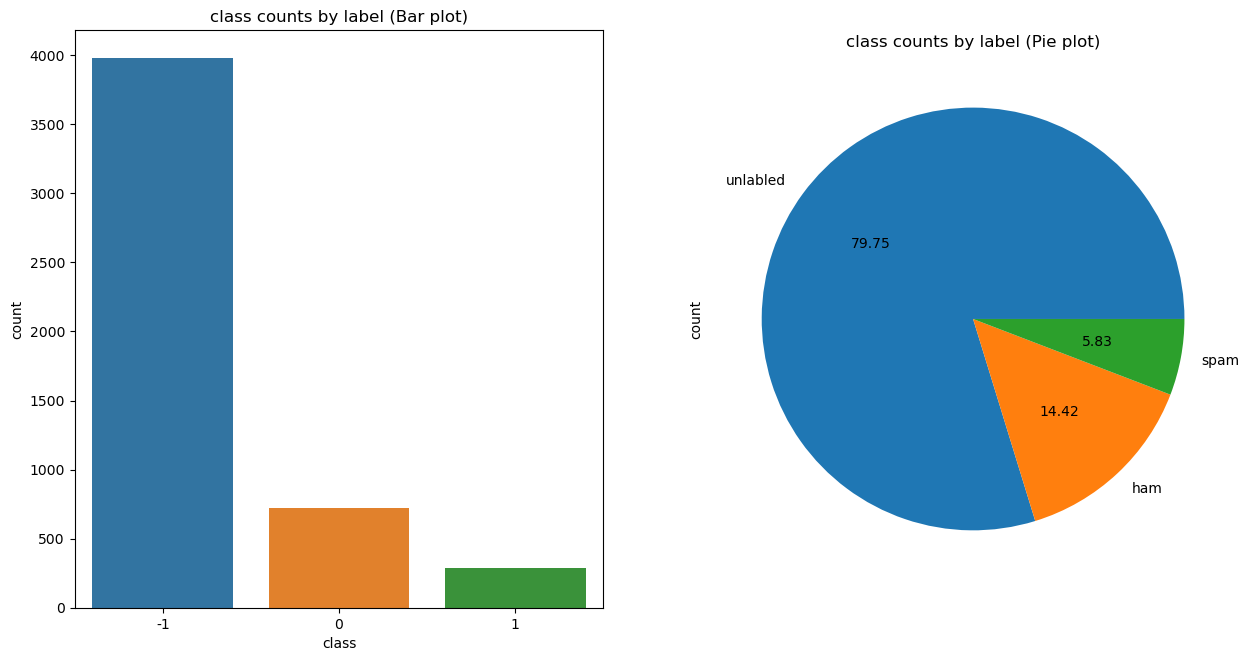

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2)
fig.set_size_inches(15, 7.5)
                   
sns.countplot(data=df, x="class",ax=ax1)
df["class"].value_counts().plot.pie(labels = ["unlabled","ham", "spam"], autopct="%0.2f", ax=ax2)

ax1.set_title("class counts by label (Bar plot)")
ax2.set_title("class counts by label (Pie plot)")

Text(0.5, 1.0, 'Unalebed vs labled (Pie plot)')

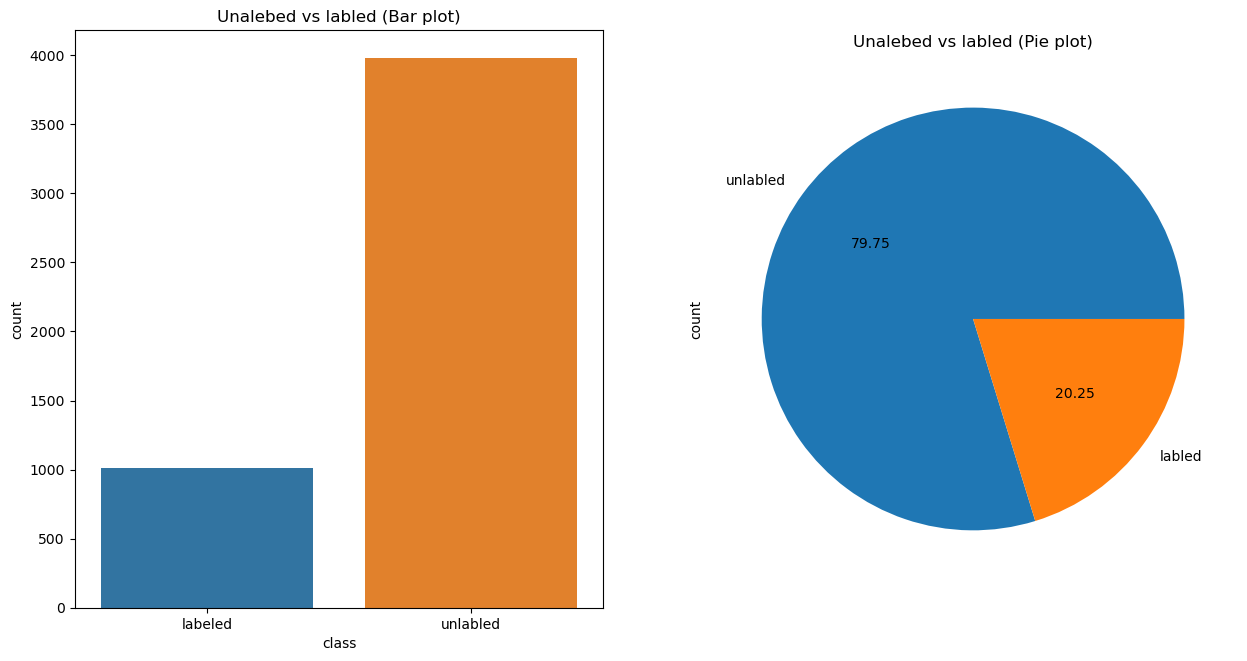

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2)
fig.set_size_inches(15, 7.5)

is_labeled = (df["class"] == -1).map({
    True:"unlabled", 
    False:"labeled"
})

sns.countplot(x=is_labeled,ax=ax1)
is_labeled.value_counts().plot.pie(labels = ["unlabled","labled"], autopct="%0.2f", ax=ax2)

ax1.set_title("Unalebed vs labled (Bar plot)")
ax2.set_title("Unalebed vs labled (Pie plot)")

- Only 12.88% of the dataset is labled.

In [11]:
labled_df = df[df["class"] != -1]

Text(0.5, 1.0, 'class counts by label (Pie plot)')

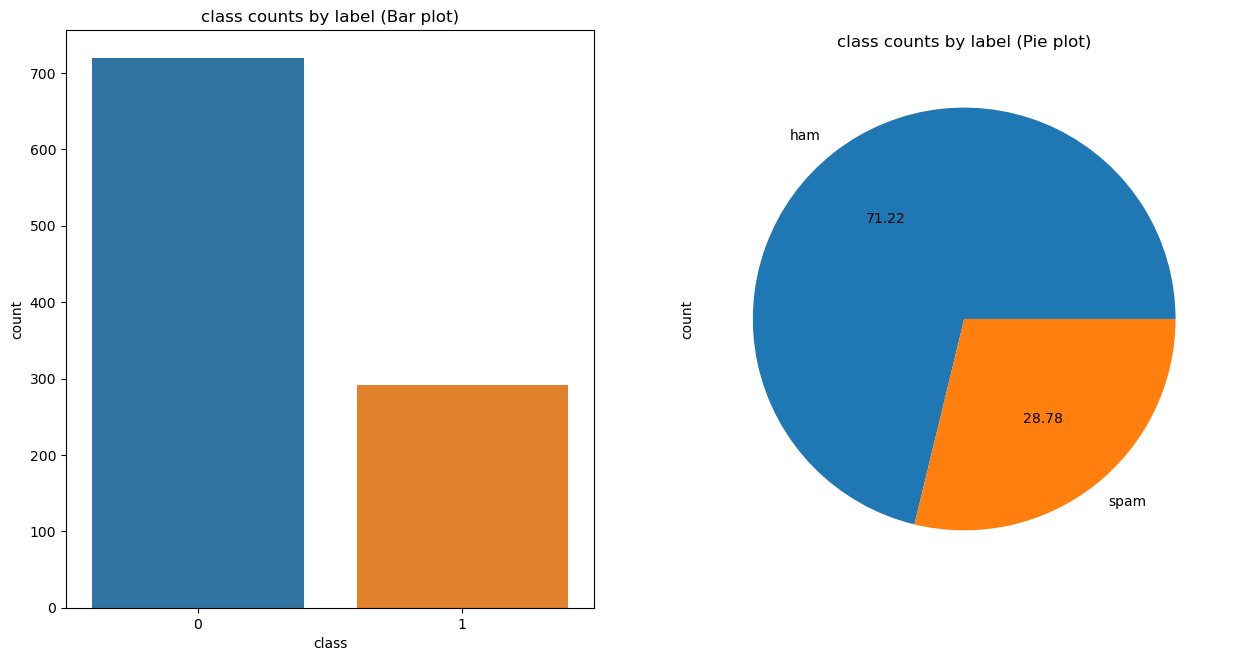

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2)
fig.set_size_inches(15, 7.5)
                   
sns.countplot(data=labled_df, x="class",ax=ax1)
labled_df["class"].value_counts().plot.pie(labels = ["ham", "spam"], autopct="%0.2f", ax=ax2)

ax1.set_title("class counts by label (Bar plot)")
ax2.set_title("class counts by label (Pie plot)")

- most of the emails contains 0 urls.
- all spam emails contains emails.

<Axes: xlabel='digits_count', ylabel='Count'>

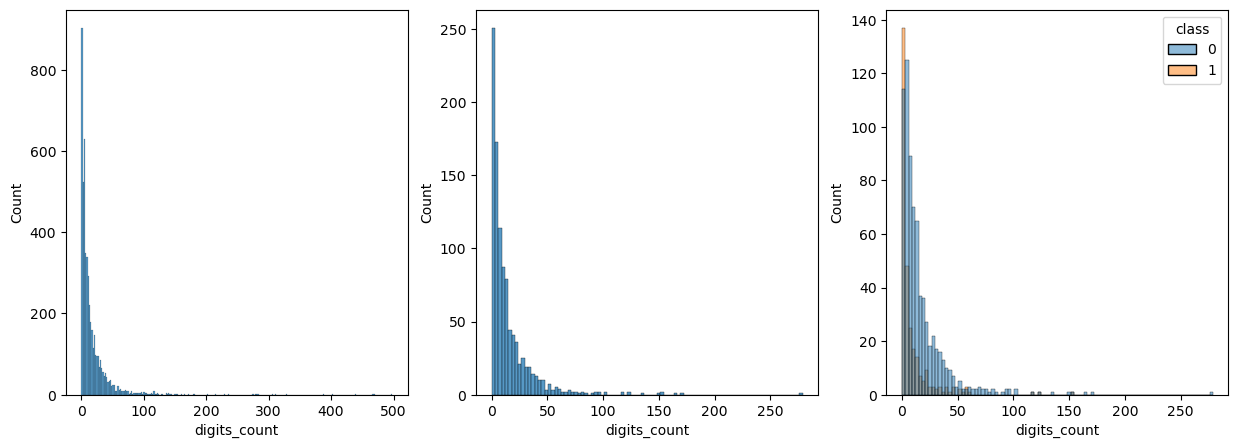

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3)
fig.set_size_inches(15, 5)

sns.histplot(data=df, x="digits_count",ax=ax1)
sns.histplot(data=labled_df, x="digits_count",ax=ax2)
sns.histplot(data=labled_df, x="digits_count",hue="class",ax=ax3)

<Axes: xlabel='digits_count', ylabel='count'>

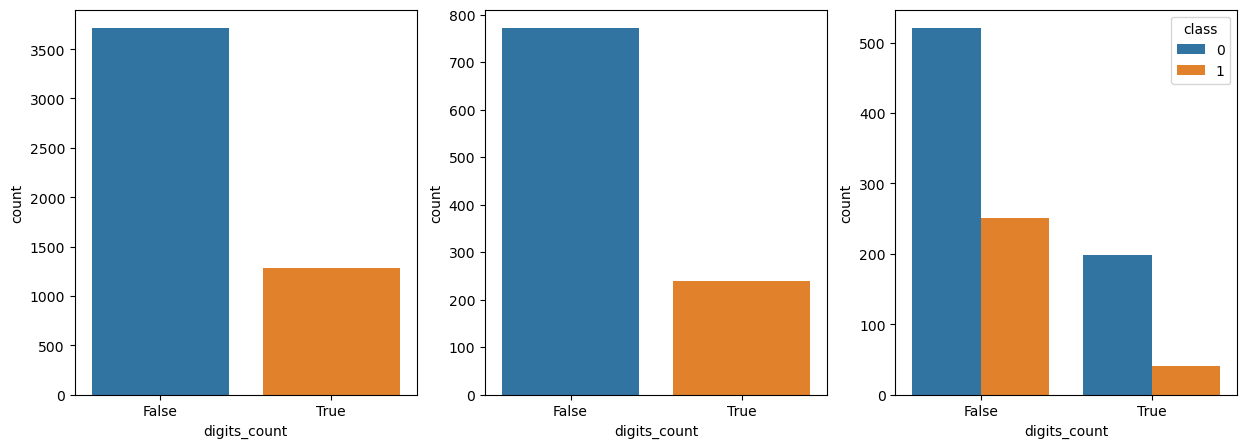

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3)
fig.set_size_inches(15, 5)
threshold = 20

sns.countplot(x=df["digits_count"] >= threshold,ax=ax1)
sns.countplot(x=labled_df["digits_count"] >= threshold,ax=ax2)
sns.countplot(x=labled_df["digits_count"] >= threshold,hue=labled_df["class"],ax=ax3)

- the digits count don't look like feature that could distinguish spam emails from non spam emails.

<Axes: xlabel='contains_currency_symbols', ylabel='count'>

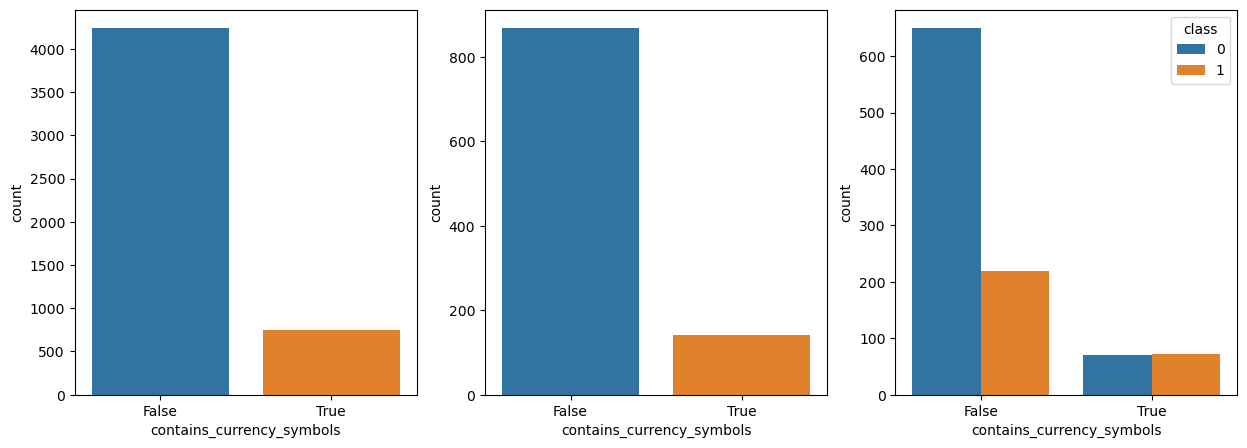

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3)
fig.set_size_inches(15, 5)

sns.countplot(data=df, x="contains_currency_symbols",ax=ax1)
sns.countplot(data=labled_df, x="contains_currency_symbols",ax=ax2)
sns.countplot(data=labled_df, x="contains_currency_symbols",hue="class",ax=ax3)

- the `contains_currency_symbols` looks like feature that could distinguish spam emails from non spam emails.

<Axes: xlabel='length', ylabel='Density'>

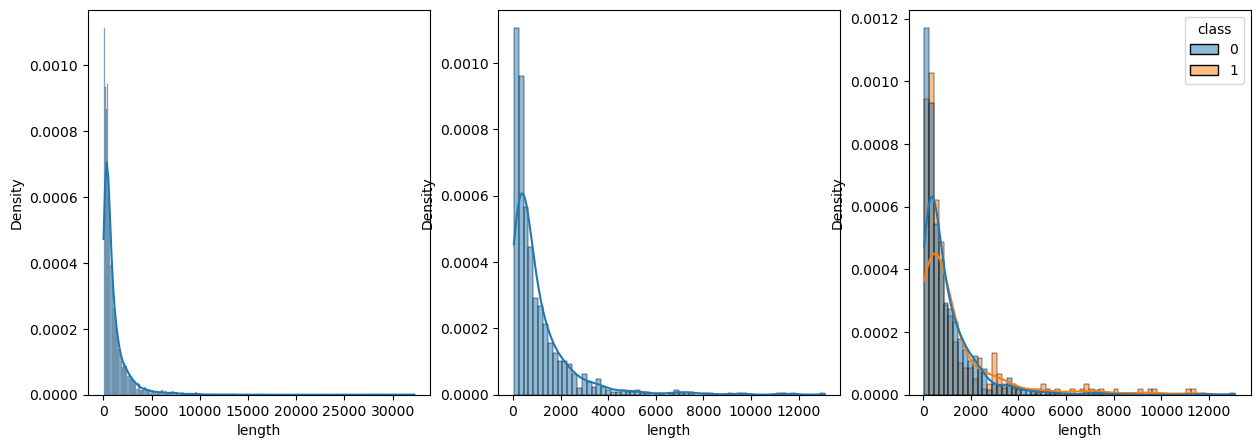

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3)
fig.set_size_inches(15, 5)

sns.histplot(data=df, x="length",ax=ax1,kde=True,stat="density", common_norm=False)
sns.histplot(data=labled_df, x="length",ax=ax2,kde=True,stat="density", common_norm=False)
sns.histplot(data=labled_df, x="length",hue="class",ax=ax3,kde=True,stat="density",common_norm=False)

- The labled data points and the whole dataset have similar probability distributions.
- The spam and ham emails have different probability distributions.

<Axes: xlabel='length', ylabel='Density'>

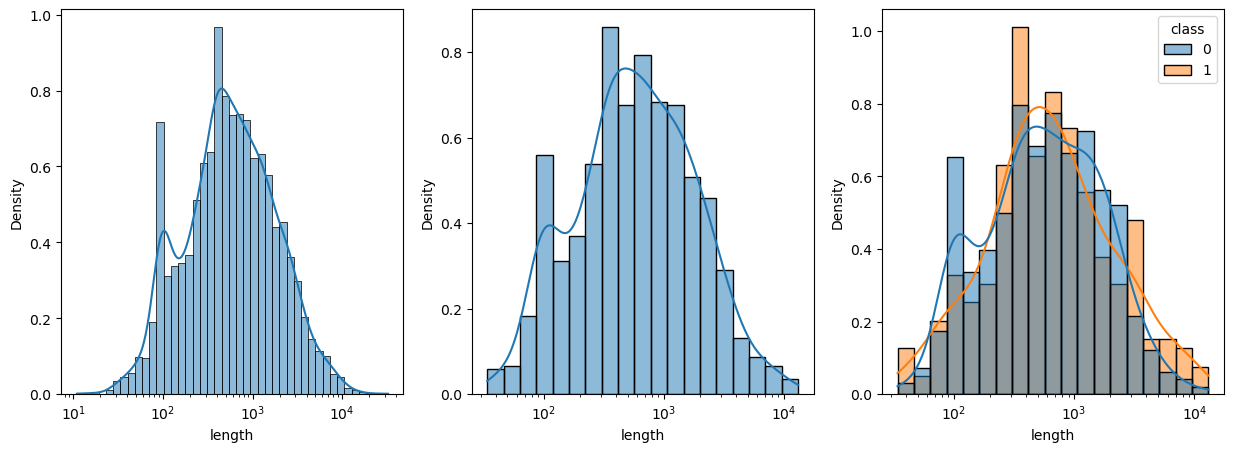

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3)
fig.set_size_inches(15, 5)

sns.histplot(data=df, x="length",ax=ax1,kde=True,stat="density", common_norm=False,log_scale=True)
sns.histplot(data=labled_df, x="length",ax=ax2,kde=True,stat="density", common_norm=False,log_scale=True)
sns.histplot(data=labled_df, x="length",hue="class",ax=ax3,kde=True,stat="density",common_norm=False,log_scale=True)

- Both the log scale for the spam and ham emails follows a normal distribution.
- But the length don't look like a useful feature.

<div id="word_frequency_analysis" >
    <h3>Word frequency analysis</h3>
</div>

In [22]:
grouped_df = labled_df[["class","content"]].groupby(by="class").agg(" ".join)
grouped_df["tokens"] = grouped_df["content"].apply(nltk.word_tokenize)
grouped_df["frequencies"] = grouped_df["tokens"].apply(nltk.probability.FreqDist)

In [23]:
def plot_topk_results(dist,ax,k = 20):
    most_common = dist.most_common(k)
    tokens = np.array([word for word,count in most_common])
    counts = np.array([count for word,count in most_common])
    sns.barplot(x=tokens,y=counts,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=80)

Text(0.5, 1.0, 'Top 20 most frequent words in spam emails')

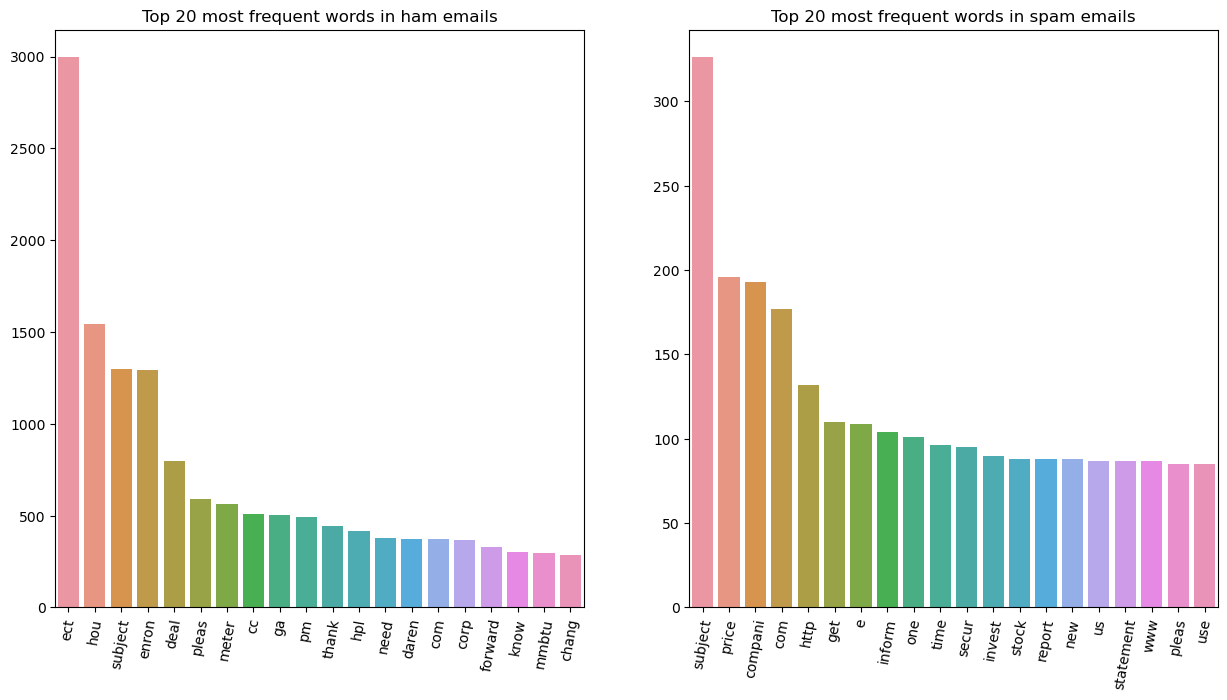

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols = 2,nrows = 1)

fig.set_size_inches(15, 7.5)

plot_topk_results(grouped_df["frequencies"].loc[0], ax=ax1, k = 20)
plot_topk_results(grouped_df["frequencies"].loc[1], ax=ax2, k = 20)

ax1.set_title("Top 20 most frequent words in ham emails")
ax2.set_title("Top 20 most frequent words in spam emails")

In [25]:
wc1, wc2 = WordCloud(), WordCloud()

In [26]:
im1 = wc1.generate(grouped_df["content"].loc[0])
im2 = wc2.generate(grouped_df["content"].loc[1])

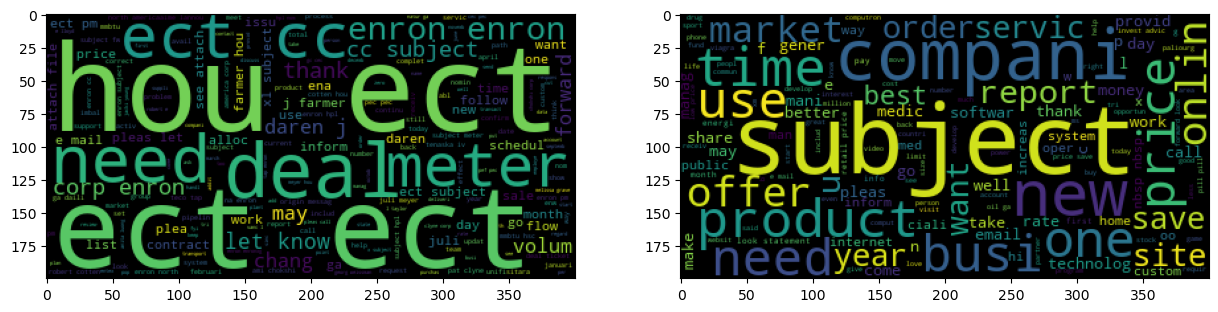

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols = 2,nrows = 1)

fig.set_size_inches(15, 7.5)

ax1.imshow(im1)
ax2.imshow(im2)

In [28]:
unlabled_df = df[df["class"] == -1]

In [29]:
wc3, wc4 = WordCloud(), WordCloud()

In [30]:
labled_text = " ".join(labled_df["content"].tolist())
unlabled_text = " ".join(unlabled_df["content"].tolist())

In [31]:
im3 = wc3.generate(labled_text)
im4 = wc4.generate(unlabled_text)

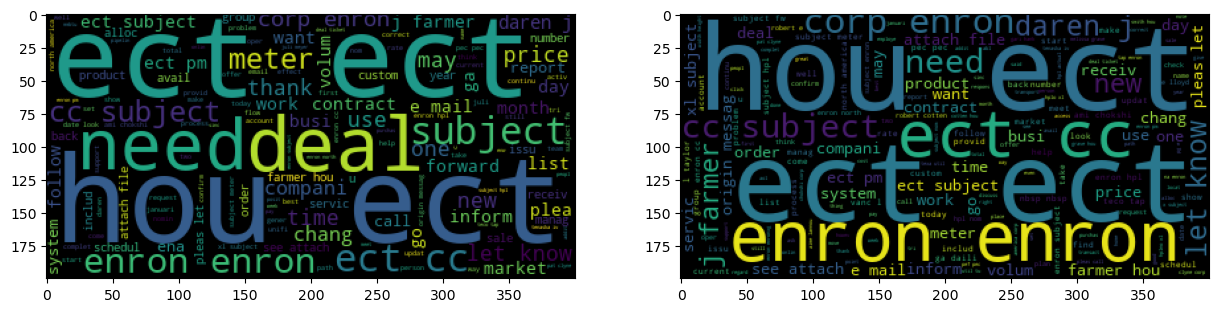

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols = 2,nrows = 1)

fig.set_size_inches(15, 7.5)

ax1.imshow(im3)
ax2.imshow(im4)

<div id="correlations_analysis" >
    <h3>Correlations analysis</h3>
</div>

In [33]:
labled_df = labled_df.copy()

In [34]:
labled_df = labled_df.astype({"contains_currency_symbols":np.int64})

- Standard correlation matrix.

In [35]:
correlation_matrix = labled_df.select_dtypes(include=np.number).corr()

<Axes: >

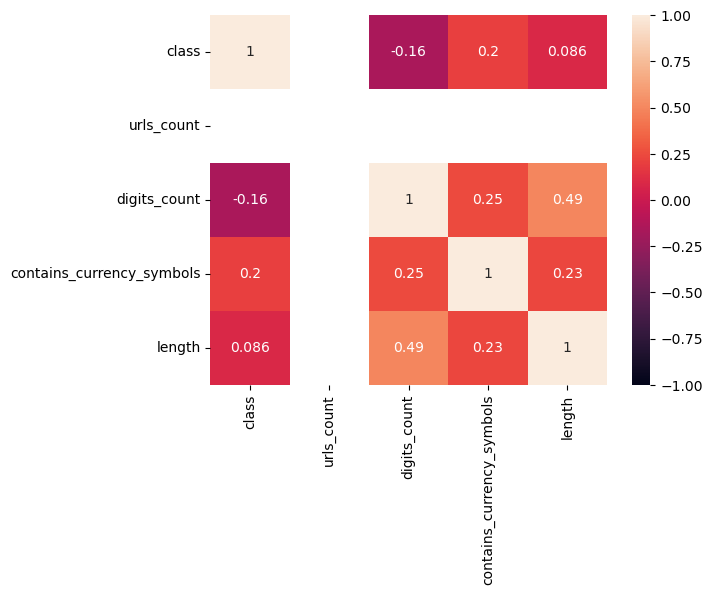

In [36]:
sns.heatmap(data=correlation_matrix,vmin=-1,vmax=1,annot=True)

- spearman's correlation matrix allows to capture non-linear relationships.

- All the engineered features have a low correlation with the taregt features.

<div id="conclusions" >
    <h3>Conclusions</h3>
</div>

- from the similarities between the graphs of the labled dataset and the whole dataset,we can conclude that the labled data points are representatives to the dataset.
- Text frequency-based feature extraction techniques are strong condidate for the text feature extraction step
- All the engineered features have a low correlation with the taregt features.